In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib
#matplotlib.use('SVG')  # <-- uncomment when saving figures rather than plotting inline
import matplotlib.pylab as plt
import pandas as pd


In [5]:
# import 
phyla_df = []
phyla_df = pd.read_csv('../data/diet_map_all_samples_no_dZD_L2_no_dZDweaned.txt',\
                      sep='\t')
# copy and collapse into mean
descriptions = phyla_df['Description']
description_dict = {'dPD, weaned':'Weaned, dPD (0d)',\
 'dN, weaned':'Weaned, dN (0d)',
 'dN, 5 days':'dN (5d)',\
 'dN, 8 days':'dN (8d)',\
 'dN, 12 days':'dN (12d)',\
 'dN, 15 days':'dN (15d)',\
 'dPD, 5 days':'dPD (5d)',\
 'dPD, 8 days':'dPD (8d)',\
 'dPD, 12 days':'dPD (12d)',\
 'dPD, 15 days':'dPD (15d)'}
phyla_w_c_labels = phyla_df.copy()
phyla_w_c_labels = phyla_w_c_labels.replace({'Description':description_dict})


phyla_w_c = phyla_w_c_labels.copy()
phyla_w_c_labels = phyla_w_c_labels.drop('#SampleID',1)
group_order = ['Weaned, dN (0d)','dN (5d)', 'dN (8d)', 'dN (12d)', 'dN (15d)', \
               'Weaned, dPD (0d)','dPD (5d)', 'dPD (8d)','dPD (12d)', 'dPD (15d)']


phyla_means = phyla_w_c_labels.groupby('Description', sort=False).mean()
phyla_std = phyla_w_c_labels.groupby('Description', sort=False).std()
phyla_means = phyla_means.reindex(group_order)
phyla_std = phyla_std.reindex(group_order)

means_to_plot = {col:phyla_means[col].as_matrix() for col in list(phyla_means.columns)}
std_to_plot = {col:phyla_std[col].as_matrix() for col in list(phyla_std.columns)}
phyla_means

,Unassigned,Other,Actinobacteria,Bacteroidetes,Cyanobacteria,Firmicutes,Proteobacteria,Tenericutes,Verrucomicrobia
Description,,,,,,,,,
"Weaned, dN (0d)",0.095264,0.000000,0.000000,0.412072,0,0.433616,0.055916,0.003132,0.000000
dN (5d),0.079739,0.000358,0.000000,0.134321,0,0.251943,0.411580,0.122060,0.000000
dN (8d),0.072920,0.000000,0.000000,0.193560,0,0.228678,0.342612,0.161961,0.000270
dN (12d),0.077568,0.000075,0.000000,0.176791,0,0.243673,0.308049,0.115993,0.077851
dN (15d),0.079113,0.000000,0.000317,0.175360,0,0.163241,0.407635,0.067068,0.107267
"Weaned, dPD (0d)",0.101062,0.000000,0.000000,0.432522,0,0.464934,0.001085,0.000397,0.000000
dPD (5d),0.096483,0.000000,0.000000,0.379297,0,0.509833,0.003386,0.010690,0.000311
dPD (8d),0.116178,0.000000,0.000000,0.300788,0,0.422959,0.128256,0.031436,0.000383
dPD (12d),0.110535,0.000127,0.000000,0.363655,0,0.331254,0.010119,0.006991,0.177318


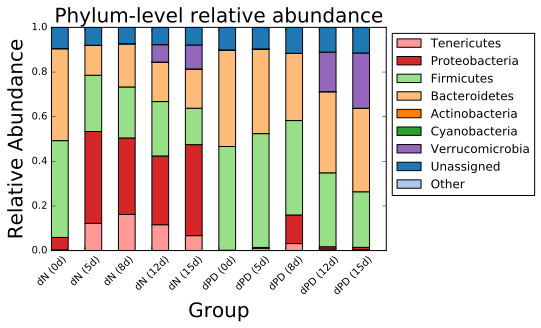

In [10]:

ind = np.arange(numgroups)
width = 0.5
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
phyla_colors = {'Unassigned':tableau20[0],'Other':tableau20[1],'Actinobacteria':\
                tableau20[2],'Bacteroidetes':tableau20[3],'Cyanobacteria':tableau20[4],\
                'Firmicutes':tableau20[5],'Proteobacteria':tableau20[6],\
                'Tenericutes':tableau20[7],'Verrucomicrobia':tableau20[8]}

bars = {}
numgroups = len(phyla_means.index)
previous_means = 0
for phyla in means_to_plot.keys():
    bars[phyla] = plt.bar(ind,means_to_plot[phyla],width,color=phyla_colors[phyla],\
                         bottom=previous_means, label=phyla)
    previous_means = means_to_plot[phyla] + previous_means

    

plt.ylabel('Relative Abundance', fontsize=20)
plt.xlabel('Group', fontsize=20)
plt.title('Phylum-level relative abundance', fontsize=20)
h = plt.xticks(ind, ('dN (0d)','dN (5d)', 'dN (8d)', 'dN (12d)', 'dN (15d)', \
               'dPD (0d)','dPD (5d)', 'dPD (8d)','dPD (12d)', 'dPD (15d)'), rotation = 45)

plt.yticks(np.arange(0, 1.001, 0.2))
plt.ylim([0,1])
lgd = plt.legend(bbox_to_anchor=(1,1), loc=2)
#plt.savefig('../results/phylum_level_relative_abundance', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

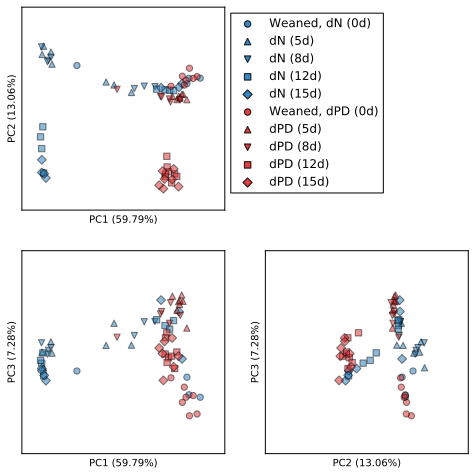

In [11]:
beta_df = pd.read_csv('../data/diet_effect_no_dZD_weighted_unifrac_pc1_2_3.tsv',\
                      sep='\t')
beta_df = beta_df.merge(phyla_w_c[['#SampleID','Description']])
#phyla_w_c

color1 = tableau20[0]
color2 = tableau20[6]

group_colors = {'Weaned, dN (0d)':color1,'Weaned, dPD (0d)':color2,'dN (5d)':color1,\
                'dPD (5d)':color2, 'dN (8d)':color1, 'dPD (8d)':color2, 'dN (12d)':color1,\
                'dPD (12d)':color2, 'dN (15d)':color1, 'dPD (15d)':color2}
group_fmt = {'Weaned, dN (0d)':'-o','Weaned, dPD (0d)':'-o','dN (5d)':'-^', 'dPD (5d)':'-^',\
             'dN (8d)':'-v', 'dPD (8d)':'-v', 'dN (12d)':'-s',\
             'dPD (12d)':'-s', 'dN (15d)':'-D', 'dPD (15d)':'-D'}
group_order = ['Weaned, dN (0d)','dN (5d)', 'dN (8d)', 'dN (12d)', 'dN (15d)', \
               'Weaned, dPD (0d)','dPD (5d)', 'dPD (8d)','dPD (12d)', 'dPD (15d)']


plot_pc1pc2 = {}
plot_pc1pc3 = {}
plot_pc2pc3 = {}
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223,sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(224,sharex=ax1, sharey=ax1)
for group in group_order:
    samples = beta_df[beta_df['Description'] == group]
    PC1 = samples['PC1'].as_matrix()
    PC2 = samples['PC2'].as_matrix()
    PC3 = samples['PC3'].as_matrix()
    plot_pc1pc2[group] = ax1.scatter(PC1,PC2,c=group_colors[group],alpha=0.5,s=40,\
                                 marker=group_fmt[group].replace('-',''),\
                                label=group)
    plot_pc1pc3[group] = ax2.scatter(PC1,PC3,c=group_colors[group],alpha=0.5,s=40,\
                                 marker=group_fmt[group].replace('-',''),\
                                label=group)
    plot_pc2pc3[group] = ax3.scatter(PC2,PC3,c=group_colors[group],alpha=0.5,s=40,\
                                 marker=group_fmt[group].replace('-',''),\
                                label=group)

# Clear the tick labels
ax1.get_yaxis().set_ticks([])
ax1.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax3.get_xaxis().set_ticks([])

# Show variance explained--these were manually recorded from QIIME output
ax1.set_xlabel('PC1 (59.79%)')
ax1.set_ylabel('PC2 (13.06%)')
ax2.set_xlabel('PC1 (59.79%)')
ax2.set_ylabel('PC3 (7.28%)')
ax3.set_xlabel('PC2 (13.06%)')
ax3.set_ylabel('PC3 (7.28%)')

lgd = ax1.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1,1))
fig = plt.gcf()
fig.set_size_inches(8,8)
#fig.tight_layout()
plt.savefig('../results/bdiv_PCoA',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()